![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# [Deep Learning Fundamentals - Logistic Regression](https://www.coursera.org/learn/deep-learning-fundamentals-logistic-regression/)

# Task 1: Introduction

In [1]:
import random
import numpy as np
import warnings
import helpers.plt, helpers.dataset
from matplotlib import pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore")

print("Libraries imported")

Libraries imported


# Task 2: Hyperparameters

In [2]:
lr = 0.3
batch_size = 300
iterations = 40

# Task 3: Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = helpers.dataset.get_data()

Loading data..
Done.


In [4]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (12665, 28, 28)
Shape of y_train: (12665,)
Shape of X_test: (2115, 28, 28)
Shape of y_test: (2115,)


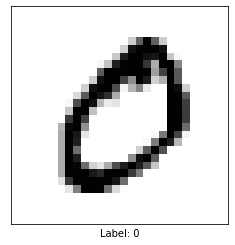

In [5]:
helpers.plt.show_example(X_train[0], y_train[0])

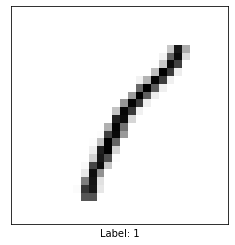

In [6]:
helpers.plt.show_example(X_train[-1], y_train[-1])

# Task 4: A Mini Batch of Examples

X_batch shape (1, 784)


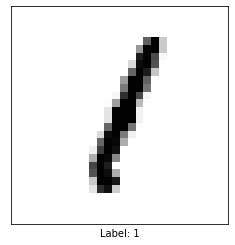

In [7]:
X_batch, y_batch = helpers.dataset.get_random_batch(X_train, y_train, 1)

print("X_batch shape", X_batch.shape)

helpers.plt.show_example(X_batch[0], y_batch[0])

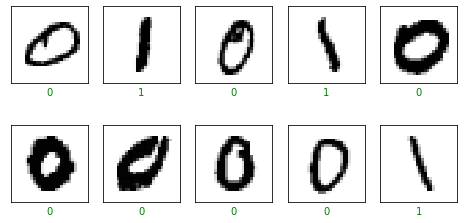

In [8]:
X_batch, y_batch = helpers.dataset.get_random_batch(X_train, y_train, 10)

helpers.plt.show_ten_examples(X_batch, y_batch, y_batch)

# Task 5: Create Model

A logistic model is simply a multi variable linear equation which gives a binary output. The pixel values of our input images are going to be the input features - the independent variables that form the logistic regression equation. And the class label - either 0 or 1 in our case, is the output y.

\begin{equation}
z = b + w_1x_1 + w_2x_2 + ... + w_N * x_N
\end{equation}

\begin{equation}
y = \sigma(z)
\end{equation}

To simplify, we can use vectorized represenation where X is the feature matrix and W is the weight matrix:

\begin{equation}
y = \sigma(W^T.X + b)
\end{equation}

In [9]:
class LogisticModel:
    def __init__(self, num_features):
        self.W = np.reshape(np.random.randn((num_features)), (num_features, 1))
        self.b = np.zeros((1, 1))
        self.num_features = num_features
        self.losses = []
        self.accuracies = []

    def summary(self):
        print("=================================")
        print("Number of features:", self.num_features)
        print("Shape of weights:", self.W.shape)
        print("Shape of biases:", self.b.shape)
        print("=================================")


model = LogisticModel(num_features=784)
model.summary()

Number of features: 784
Shape of weights: (784, 1)
Shape of biases: (1, 1)


# Task 5: Forward Pass

For a single training example, the loss should be:

\begin{equation}
L(y, \hat{y}) = -(y * log(\hat{y}) + (1 - y) * log(1 - \hat{y}))
\end{equation}

In [10]:
class LogisticModel(LogisticModel):
    def _forward_pass(self, X, y=None):
        batch_size = X.shape[0]
        Z = X @ self.W + self.b
        A = 1.0 / (1.0 + np.exp(-Z))
        loss = float(1e6)
        if y is not None:
            loss = -1 * np.sum(y.T @ np.log(A) + np.matmul((1 - y).T, np.log(1 - A)))
            loss /= batch_size
        return A, loss

# Task 6: Backward Pass

In [11]:
class LogisticModel(LogisticModel):
    def _backward_pass(self, A, X, y):
        batch_size = X.shape[0]
        dZ = A - y
        dW = (X.T @ dZ) / batch_size
        db = np.sum(dZ) / batch_size
        return dW, db

# Task 7: Update Parameters

In [12]:
class LogisticModel(LogisticModel):
    def _update_params(self, dW, db, lr):
        self.W -= lr * dW
        self.b -= lr * db

# Task 8: Check Model Performance

In [13]:
class LogisticModel(LogisticModel):
    def predict(self, X, y=None):
        A, loss = self._forward_pass(X, y)
        y_hat = A > 0.5
        return np.squeeze(y_hat), loss

    def evaluate(self, X, y):
        y_hat, loss = self.predict(X, y)
        accuracy = np.sum(y_hat == np.squeeze(y)) / X.shape[0]
        return accuracy, loss

In [14]:
model = LogisticModel(784)
model.summary()

Number of features: 784
Shape of weights: (784, 1)
Shape of biases: (1, 1)


In [15]:
X, y = helpers.dataset.get_random_batch(X_test, y_test, batch_size)
acc, loss = model.evaluate(X, y)
acc, loss

(0.55, 2.248886121741473)

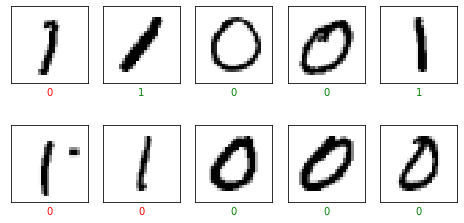

In [16]:
y_pred, _ = model.predict(X)
helpers.plt.show_ten_examples(X, y, y_pred)

# Task 9: Training Loop

In [17]:
class LogisticModel(LogisticModel):
    def train(self, batch_size, get_batch, lr, iterations, X_train, y_train, X_test, y_test):
        print("Training...")
        self.accuracies = []
        self.losses = []

        for i in range(iterations):
            X, y = get_batch(X_train, y_train, batch_size)
            A, _ = self._forward_pass(X, y)
            dW, db = self._backward_pass(A, X, y)
            self._update_params(dW, db, lr)

            X, y = get_batch(X_test, y_test, batch_size)
            val_acc, val_loss = self.evaluate(X, y)
            self.accuracies.append(val_acc)
            self.losses.append(val_loss)

            print(f"Iter: {i}, Val Acc: {val_acc:.3f}, Val Loss: {val_loss:.3f}")

        print("Training finished.")

# Task 10: Training the Model

In [19]:
model = LogisticModel(784)

X, y = helpers.dataset.get_random_batch(X_test, y_test, batch_size)
print("Before training performance:", model.evaluate(X, y))

model.train(
    batch_size,
    helpers.dataset.get_random_batch,
    lr,
    iterations,
    X_train,
    y_train,
    X_test,
    y_test,
)
print("After training performance:", model.evaluate(X, y))

Before training performance: (0.39, 2.5425697433142527)
Training...
Iter: 0, Val Acc: 0.587, Val Loss: 1.389
Iter: 1, Val Acc: 0.757, Val Loss: 1.027
Iter: 2, Val Acc: 0.837, Val Loss: 0.527
Iter: 3, Val Acc: 0.853, Val Loss: 0.453
Iter: 4, Val Acc: 0.910, Val Loss: 0.313
Iter: 5, Val Acc: 0.940, Val Loss: 0.196
Iter: 6, Val Acc: 0.907, Val Loss: 0.317
Iter: 7, Val Acc: 0.953, Val Loss: 0.173
Iter: 8, Val Acc: 0.940, Val Loss: 0.229
Iter: 9, Val Acc: 0.960, Val Loss: 0.166
Iter: 10, Val Acc: 0.953, Val Loss: 0.158
Iter: 11, Val Acc: 0.953, Val Loss: 0.124
Iter: 12, Val Acc: 0.940, Val Loss: 0.170
Iter: 13, Val Acc: 0.973, Val Loss: 0.079
Iter: 14, Val Acc: 0.960, Val Loss: 0.126
Iter: 15, Val Acc: 0.950, Val Loss: 0.112
Iter: 16, Val Acc: 0.967, Val Loss: 0.116
Iter: 17, Val Acc: 0.950, Val Loss: 0.183
Iter: 18, Val Acc: 0.977, Val Loss: 0.059
Iter: 19, Val Acc: 0.957, Val Loss: 0.148
Iter: 20, Val Acc: 0.970, Val Loss: 0.108
Iter: 21, Val Acc: 0.987, Val Loss: 0.038
Iter: 22, Val Acc:

# Task 11: Display the Results

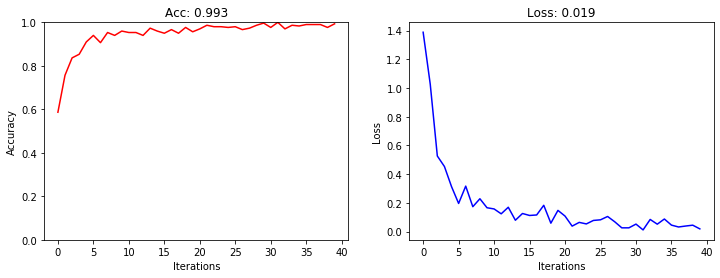

In [20]:
helpers.plt.plot_metrics(model)

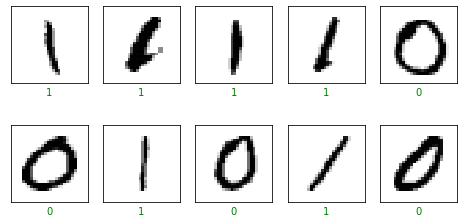

In [21]:
y_pred, _ = model.predict(X, y)
helpers.plt.show_ten_examples(X, y, y_pred)